# **Final Project**
# Sentiment Analysis komentar aplikasi via Google Playstore
---
<br>

Muhammad Raditya Prakoso

Full Stack Data Science Sanber Campus X ITB (Batch 4)

<br>

**Abstrak**

>  <p align="justify"> Proyek ini bertujuan untuk melakukan analisis sentimen terhadap komentar pengguna aplikasi yang diambil dari Google Playstore. Masalah yang ingin dipecahkan adalah bagaimana memahami persepsi pengguna terhadap fitur, performa, atau kelebihan dan kekurangan aplikasi berdasarkan ulasan mereka. Dengan analisis ini, pengembang aplikasi dapat mengidentifikasi kekuatan dan kelemahan produk mereka sehingga dapat melakukan perbaikan yang lebih terarah. Manfaat dari pelaksanaan tugas akhir ini adalah meningkatkan kepuasan pengguna dan daya saing aplikasi di pasar.






# **Data Scrapping**
---
**Definisi**

<p align="justify"> Data scraping adalah proses otomatisasi pengambilan data dari suatu sumber, seperti halaman web, dokumen elektronik, atau aplikasi, menggunakan program atau alat tertentu. Metode ini dirancang untuk mengekstrak informasi yang tersedia, baik dalam format terstruktur maupun tidak terstruktur, dengan tujuan untuk menyusun data tersebut menjadi bentuk yang lebih mudah dianalisis atau digunakan lebih lanjut.

<br>
<br>

**Tujuan**
<p align="justify"> Data scraping digunakan untuk memperoleh informasi dari berbagai sumber sebagai bahan analisis.

In [32]:
!pip install google-play-scraper

In [33]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [34]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.shopee.id',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1000,
    filter_score_with=None
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,72f57f68-d1fe-4b3d-993d-3da79f5cbb50,Wisnu Wardhana,https://play-lh.googleusercontent.com/a/ACg8oc...,Untuk apk dan pedagang gak masalah. Yg masalah...,2,89,3.40.11,2025-01-11 05:35:51,"Hai kak Wisnu Wardhana, mohon maaf atas ketida...",2025-01-11 06:42:14,3.40.11
1,a112398e-2f39-4393-ac1c-1e3218c01a4b,Okky Andries,https://play-lh.googleusercontent.com/a/ACg8oc...,"Bagus sekali, cuma kurang 1 dlm masalah pengir...",5,395,3.41.45,2025-01-11 08:58:27,"Hai kak, terima kasih ya untuk feedbacknya. Ke...",2025-01-11 09:33:41,3.41.45
2,ae0fc60f-6577-4633-93d5-e59245a9783f,MrSlime,https://play-lh.googleusercontent.com/a-/ALV-U...,"boleh, hanya saja butuh optimalisasi karena ap...",4,31,3.41.45,2025-01-11 00:39:26,"Hai kak, sebelumnya terimakasih buat bintangny...",2024-12-29 03:21:48,3.41.45
3,cc43cfd7-1eaa-42a0-8a47-199e1a885687,Mirnawati Putri,https://play-lh.googleusercontent.com/a-/ALV-U...,Kenapa bintang 3 ? karena fasilitas pengiriman...,3,24,3.41.45,2025-01-11 00:34:03,"Hai kak Mirnawati Putri, mohon maaf atas ketid...",2025-01-11 01:07:07,3.41.45
4,16806e33-7ae9-4b4d-bb60-602bc95ad1cd,Toms Broly,https://play-lh.googleusercontent.com/a/ACg8oc...,"Ternyata banyak yg sepemikiran sama saya yaa,,...",1,130,3.41.45,2025-01-10 06:15:22,"Hai kak, maaf yaa udh buat ga nyaman terkait k...",2025-01-10 07:29:55,3.41.45


In [ ]:
df_busu[['userName', 'score','at', 'content']].head()

,userName,score,at,content
0,Wisnu Wardhana,2,2025-01-11 05:35:51,Untuk apk dan pedagang gak masalah. Yg masalah...
1,Okky Andries,5,2025-01-11 08:58:27,"Bagus sekali, cuma kurang 1 dlm masalah pengir..."
2,MrSlime,4,2025-01-11 00:39:26,"boleh, hanya saja butuh optimalisasi karena ap..."
3,Mirnawati Putri,3,2025-01-11 00:34:03,Kenapa bintang 3 ? karena fasilitas pengiriman...
4,Toms Broly,1,2025-01-10 06:15:22,"Ternyata banyak yg sepemikiran sama saya yaa,,..."


In [ ]:
new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False)
sorted_df.head()

,userName,score,at,content
35,Doli [R],3,2025-01-11 18:31:38,Ngelek terus padahal sinyal kuat mana sering m...
178,Arienta Art,1,2025-01-11 17:34:23,Kapasitif sentuhan makin tidak responsif terut...
203,Aji Kurniawan Sandi Soewarjo,1,2025-01-11 15:02:36,"Aplikasi tukang fitnah,saya dituduh memakai bo..."
197,Fevi Wulani andayana,5,2025-01-11 13:42:07,Kenapa spaylater saya tidak bisa di gunakan ya...
139,Yogya karta,1,2025-01-11 13:15:33,aplikasi kaga jelas masa mau verifikasi wajah ...


In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']]

In [ ]:
my_df=my_df[['content', 'score']]

In [ ]:
my_df.head()

,content,score
35,Ngelek terus padahal sinyal kuat mana sering m...,3
178,Kapasitif sentuhan makin tidak responsif terut...,1
203,"Aplikasi tukang fitnah,saya dituduh memakai bo...",1
197,Kenapa spaylater saya tidak bisa di gunakan ya...,5
139,aplikasi kaga jelas masa mau verifikasi wajah ...,1


# **Labelling**
---
**Definisi**

<p align="justify"> Data labelling adalah proses pemberian label atau penanda pada dataset agar data tersebut dapat digunakan dalam proses pelatihan model kecerdasan buatan, terutama dalam bidang machine learning.

<br>
<br>

**Tujuan**
<p align="justify"> Data berlabel memungkinkan model untuk memahami pola atau hubungan antara input dan output.

In [47]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score > 3 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
1,Kapasitif sentuhan makin tidak responsif terut...,1,Negatif,kapasitif sentuhan makin tidak responsif terut...,kapasitif sentuhan responsif permainan frame r...,"[kapasitif, sentuhan, responsif, permainan, fr...",kapasitif sentuh responsif main frame ratenya ...
2,"Aplikasi tukang fitnah,saya dituduh memakai bo...",1,Negatif,aplikasi tukang fitnahsaya dituduh memakai bot...,aplikasi tukang fitnahsaya dituduh memakai bot...,"[aplikasi, tukang, fitnahsaya, dituduh, memaka...",aplikasi tukang fitnahsaya tuduh pakai bot pen...
3,Kenapa spaylater saya tidak bisa di gunakan ya...,5,Positif,kenapa spaylater saya tidak bisa di gunakan ya...,spaylater ya cekout isi pulsa metode pembayara...,"[spaylater, ya, cekout, isi, pulsa, metode, pe...",spaylater ya cekout isi pulsa metode bayar nya...
4,aplikasi kaga jelas masa mau verifikasi wajah ...,1,Negatif,aplikasi kaga jelas masa mau verifikasi wajah ...,aplikasi kaga verifikasi wajah kaga mulu pdaha...,"[aplikasi, kaga, verifikasi, wajah, kaga, mulu...",aplikasi kaga verifikasi wajah kaga mulu pdaha...
5,pokoknya shopee top markotop dah barang yang s...,5,Positif,pokoknya shopee top markotop dah barang yang s...,pokoknya shopee top markotop dah barang pesan ...,"[pokoknya, shopee, top, markotop, dah, barang,...",pokok shopee top markotop dah barang pesan ses...
6,"Performa shopee makin gak karu karuan,versi ya...",5,Positif,performa shopee makin gak karu karuanversi yan...,performa shopee gak karu karuanversi gak cekou...,"[performa, shopee, gak, karu, karuanversi, gak...",performa shopee gak karu karuanversi gak cekou...
7,"Males bngt sekarang belanja di sini, Free ongk...",1,Negatif,males bngt sekarang belanja di sini free ongki...,males bngt belanja free ongkir nya minimal rp ...,"[males, bngt, belanja, free, ongkir, nya, mini...",males bngt belanja free ongkir nya minimal rp ...
8,"Semakin lama semakin semak beranda shopee, men...",4,Positif,semakin lama semakin semak beranda shopee menj...,semak beranda shopee menjadikan memori handpho...,"[semak, beranda, shopee, menjadikan, memori, h...",semak beranda shopee jadi memori handphone kur...
9,"Shopee cacat!! Punya kebijakan boleh, tapi har...",1,Negatif,shopee cacat punya kebijakan boleh tapi harus ...,shopee cacat kebijakan ttep ditindak lanjuti y...,"[shopee, cacat, kebijakan, ttep, ditindak, lan...",shopee cacat bijak ttep tindak lanjut yg salah...
10,"Mudah penggunaan dan pemesanannya, pengiriman ...",5,Positif,mudah penggunaan dan pemesanannya pengiriman c...,mudah penggunaan pemesanannya pengiriman cepat...,"[mudah, penggunaan, pemesanannya, pengiriman, ...",mudah guna mesan kirim cepat bilang rusa mudah...


In [ ]:
my_df.to_csv("scrapped_data.csv", index = False)

# **Cleaning**
---

**Definisi**

<p align="justify"> Data cleaning (atau data cleansing) adalah proses identifikasi, perbaikan, atau penghapusan data yang tidak akurat, tidak lengkap, tidak relevan, duplikat, atau tidak terstruktur dari sebuah dataset. Proses ini bertujuan untuk meningkatkan kualitas dan keakuratan data agar dapat digunakan secara efektif dalam analisis data atau pengembangan model machine learning.

<br>
<br>

**Tujuan**
<p align="justify"> Dengan membersihkan data, proses analisis atau pelatihan model menjadi lebih efisien karena tidak ada waktu yang terbuang untuk menangani anomali atau kesalahan dalam data.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/scrapped_data.csv')
my_df.head(50)

,content,score,Label
0,Ngelek terus padahal sinyal kuat mana sering m...,3,NaN
1,Kapasitif sentuhan makin tidak responsif terut...,1,Negatif
2,"Aplikasi tukang fitnah,saya dituduh memakai bo...",1,Negatif
3,Kenapa spaylater saya tidak bisa di gunakan ya...,5,Positif
4,aplikasi kaga jelas masa mau verifikasi wajah ...,1,Negatif
5,pokoknya shopee top markotop dah barang yang s...,5,Positif
6,"Performa shopee makin gak karu karuan,versi ya...",5,Positif
7,"Males bngt sekarang belanja di sini, Free ongk...",1,Negatif
8,"Semakin lama semakin semak beranda shopee, men...",4,Positif
9,"Shopee cacat!! Punya kebijakan boleh, tapi har...",1,Negatif


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1000 non-null   object
 1   score    1000 non-null   int64 
 2   Label    881 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
my_df.isna()

,content,score,Label
0,False,False,True
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,True
996,False,False,False
997,False,False,False
998,False,False,False


In [ ]:
my_df.isna().any()

,0
content,False
score,False
Label,True


In [ ]:
my_df.isnull().sum()

,0
content,0
score,0
Label,119


# **Cleaning: Handling Missing Value-Ignore Tuple**
---
<p align="justify"> Ignore Tuple adalah salah satu metode dalam menangani data yang memiliki missing values (nilai kosong) dalam proses data cleaning. Metode ini dilakukan dengan mengabaikan atau menghapus seluruh baris (tuple) yang memiliki nilai kosong pada salah satu atau beberapa atribut.

<p align="justify"> Metode ini cocok diterapkan apabila missing values hanya muncul pada sebagian kecil dataset dan penghapusan baris tersebut tidak memengaruhi analisis atau hasil akhir secara signifikan.

In [ ]:
my_df.dropna(subset=['Label'],inplace = True)

In [ ]:
my_df.isnull().sum()

,0
content,0
score,0
Label,0


In [ ]:
my_df.head(50)

,content,score,Label
1,Kapasitif sentuhan makin tidak responsif terut...,1,Negatif
2,"Aplikasi tukang fitnah,saya dituduh memakai bo...",1,Negatif
3,Kenapa spaylater saya tidak bisa di gunakan ya...,5,Positif
4,aplikasi kaga jelas masa mau verifikasi wajah ...,1,Negatif
5,pokoknya shopee top markotop dah barang yang s...,5,Positif
6,"Performa shopee makin gak karu karuan,versi ya...",5,Positif
7,"Males bngt sekarang belanja di sini, Free ongk...",1,Negatif
8,"Semakin lama semakin semak beranda shopee, men...",4,Positif
9,"Shopee cacat!! Punya kebijakan boleh, tapi har...",1,Negatif
10,"Mudah penggunaan dan pemesanannya, pengiriman ...",5,Positif


In [ ]:
my_df.to_csv("shopeepreprocessing.csv", index = False)

# **Text Processing**
---
<p align="justify"> Text Processing adalah serangkaian langkah untuk mempersiapkan data teks mentah agar lebih terstruktur dan siap digunakan dalam analisis data atau pelatihan model pembelajaran mesin. Proses ini bertujuan untuk mengubah teks mentah menjadi bentuk yang lebih seragam, terorganisir, dan relevan, sehingga dapat dengan mudah diolah oleh algoritma pemrosesan teks.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/shopeepreprocessing.csv')
df.head(50)

,content,score,Label
0,Kapasitif sentuhan makin tidak responsif terut...,1,Negatif
1,"Aplikasi tukang fitnah,saya dituduh memakai bo...",1,Negatif
2,Kenapa spaylater saya tidak bisa di gunakan ya...,5,Positif
3,aplikasi kaga jelas masa mau verifikasi wajah ...,1,Negatif
4,pokoknya shopee top markotop dah barang yang s...,5,Positif
5,"Performa shopee makin gak karu karuan,versi ya...",5,Positif
6,"Males bngt sekarang belanja di sini, Free ongk...",1,Negatif
7,"Semakin lama semakin semak beranda shopee, men...",4,Positif
8,"Shopee cacat!! Punya kebijakan boleh, tapi har...",1,Negatif
9,"Mudah penggunaan dan pemesanannya, pengiriman ...",5,Positif


# **Text Processing: Case Folding**
---

<p align="justify"> Case folding adalah salah satu langkah dalam text processing yang bertujuan untuk mengubah semua huruf dalam teks menjadi huruf kecil (lowercase). Proses ini dilakukan untuk memastikan konsistensi dalam pengolahan teks, sehingga kata-kata yang memiliki arti sama tetapi ditulis dengan format huruf yang berbeda dapat dianggap identik.



In [48]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [ ]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)

,content,score,Label,text_clean
1,Kapasitif sentuhan makin tidak responsif terut...,1,Negatif,kapasitif sentuhan makin tidak responsif terut...
2,"Aplikasi tukang fitnah,saya dituduh memakai bo...",1,Negatif,aplikasi tukang fitnahsaya dituduh memakai bot...
3,Kenapa spaylater saya tidak bisa di gunakan ya...,5,Positif,kenapa spaylater saya tidak bisa di gunakan ya...
4,aplikasi kaga jelas masa mau verifikasi wajah ...,1,Negatif,aplikasi kaga jelas masa mau verifikasi wajah ...
5,pokoknya shopee top markotop dah barang yang s...,5,Positif,pokoknya shopee top markotop dah barang yang s...
6,"Performa shopee makin gak karu karuan,versi ya...",5,Positif,performa shopee makin gak karu karuanversi yan...
7,"Males bngt sekarang belanja di sini, Free ongk...",1,Negatif,males bngt sekarang belanja di sini free ongki...
8,"Semakin lama semakin semak beranda shopee, men...",4,Positif,semakin lama semakin semak beranda shopee menj...
9,"Shopee cacat!! Punya kebijakan boleh, tapi har...",1,Negatif,shopee cacat punya kebijakan boleh tapi harus ...
10,"Mudah penggunaan dan pemesanannya, pengiriman ...",5,Positif,mudah penggunaan dan pemesanannya pengiriman c...


# **Text Processing: Stopword Removal**
---

<p align="justify"> Stopword removal adalah proses menghapus kata-kata umum (stopwords) yang tidak memiliki nilai signifikan untuk analisis atau pemodelan teks. Stopwords adalah kata-kata yang sering muncul dalam teks tetapi biasanya tidak memberikan informasi penting. Stopword removal bertujuan untuk mengurangi dimensi data dan fokus hanya pada kata-kata yang lebih relevan dengan tujuan analisis.


In [ ]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,Label,text_clean,text_StopWord
1,Kapasitif sentuhan makin tidak responsif terut...,1,Negatif,kapasitif sentuhan makin tidak responsif terut...,kapasitif sentuhan responsif permainan frame r...
2,"Aplikasi tukang fitnah,saya dituduh memakai bo...",1,Negatif,aplikasi tukang fitnahsaya dituduh memakai bot...,aplikasi tukang fitnahsaya dituduh memakai bot...
3,Kenapa spaylater saya tidak bisa di gunakan ya...,5,Positif,kenapa spaylater saya tidak bisa di gunakan ya...,spaylater ya cekout isi pulsa metode pembayara...
4,aplikasi kaga jelas masa mau verifikasi wajah ...,1,Negatif,aplikasi kaga jelas masa mau verifikasi wajah ...,aplikasi kaga verifikasi wajah kaga mulu pdaha...
5,pokoknya shopee top markotop dah barang yang s...,5,Positif,pokoknya shopee top markotop dah barang yang s...,pokoknya shopee top markotop dah barang pesan ...
6,"Performa shopee makin gak karu karuan,versi ya...",5,Positif,performa shopee makin gak karu karuanversi yan...,performa shopee gak karu karuanversi gak cekou...
7,"Males bngt sekarang belanja di sini, Free ongk...",1,Negatif,males bngt sekarang belanja di sini free ongki...,males bngt belanja free ongkir nya minimal rp ...
8,"Semakin lama semakin semak beranda shopee, men...",4,Positif,semakin lama semakin semak beranda shopee menj...,semak beranda shopee menjadikan memori handpho...
9,"Shopee cacat!! Punya kebijakan boleh, tapi har...",1,Negatif,shopee cacat punya kebijakan boleh tapi harus ...,shopee cacat kebijakan ttep ditindak lanjuti y...
10,"Mudah penggunaan dan pemesanannya, pengiriman ...",5,Positif,mudah penggunaan dan pemesanannya pengiriman c...,mudah penggunaan pemesanannya pengiriman cepat...


# **Text Processing: Tokenizing**
---

<p align="justify"> Tokenizing adalah proses memecah teks menjadi unit-unit kecil yang disebut token, seperti kata, frasa, kalimat, atau bahkan karakter. Tokenizing adalah langkah awal dalam analisis teks atau pemrosesan Natural Language Processing, yang bertujuan untuk mengubah teks mentah menjadi struktur yang lebih terorganisir dan dapat diproses oleh algoritma atau model.

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,content,score,Label,text_clean,text_StopWord,text_tokens
1,Kapasitif sentuhan makin tidak responsif terut...,1,Negatif,kapasitif sentuhan makin tidak responsif terut...,kapasitif sentuhan responsif permainan frame r...,"[kapasitif, sentuhan, responsif, permainan, fr..."
2,"Aplikasi tukang fitnah,saya dituduh memakai bo...",1,Negatif,aplikasi tukang fitnahsaya dituduh memakai bot...,aplikasi tukang fitnahsaya dituduh memakai bot...,"[aplikasi, tukang, fitnahsaya, dituduh, memaka..."
3,Kenapa spaylater saya tidak bisa di gunakan ya...,5,Positif,kenapa spaylater saya tidak bisa di gunakan ya...,spaylater ya cekout isi pulsa metode pembayara...,"[spaylater, ya, cekout, isi, pulsa, metode, pe..."
4,aplikasi kaga jelas masa mau verifikasi wajah ...,1,Negatif,aplikasi kaga jelas masa mau verifikasi wajah ...,aplikasi kaga verifikasi wajah kaga mulu pdaha...,"[aplikasi, kaga, verifikasi, wajah, kaga, mulu..."
5,pokoknya shopee top markotop dah barang yang s...,5,Positif,pokoknya shopee top markotop dah barang yang s...,pokoknya shopee top markotop dah barang pesan ...,"[pokoknya, shopee, top, markotop, dah, barang,..."


# **Text Processing: Stemming**
---
<p align="justify"> Stemming adalah proses mengubah kata ke bentuk dasarnya (root word) dengan menghilangkan imbuhan seperti awalan, akhiran, atau sisipan. Proses ini digunakan untuk mengurangi variasi kata yang memiliki makna serupa agar lebih sederhana dan seragam dalam analisis teks.

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

4639
------------------------
1 : kapasitif : kapasitif
2 : sentuhan : sentuh
3 : responsif : responsif
4 : permainan : main
5 : frame : frame
6 : ratenya : ratenya
7 : lambat : lambat
8 : kek : kek
9 : keong : keong
10 : berat : berat
11 : membuka : buka
12 : aplikasinya : aplikasi
13 : aplikasi : aplikasi
14 : tukang : tukang
15 : fitnahsaya : fitnahsaya
16 : dituduh : tuduh
17 : memakai : pakai
18 : bot : bot
19 : penyalahgunaan : penyalahgunaan
20 : akun : akun
21 : penjual : jual
22 : ajar : ajar
23 : memanipulasi : manipulasi
24 : harga : harga
25 : penalty : penalty
26 : tunggu : tunggu
27 : balasan : balas
28 : setimpal : timpal
29 : tim : tim
30 : terkait : kait
31 : spaylater : spaylater
32 : ya : ya
33 : cekout : cekout
34 : isi : isi
35 : pulsa : pulsa
36 : metode : metode
37 : pembayaran : bayar
38 : nya : nya
39 : yg : yg
40 : ndk : ndk
41 : keterangannya : terang
42 : memenuhi : penuh
43 : syarat : syarat
44 : utk : utk
45 : solusinya : solusi
46 : kaga : kaga
47 : verif

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
1,Kapasitif sentuhan makin tidak responsif terut...,1,Negatif,kapasitif sentuhan makin tidak responsif terut...,kapasitif sentuhan responsif permainan frame r...,"[kapasitif, sentuhan, responsif, permainan, fr...",kapasitif sentuh responsif main frame ratenya ...
2,"Aplikasi tukang fitnah,saya dituduh memakai bo...",1,Negatif,aplikasi tukang fitnahsaya dituduh memakai bot...,aplikasi tukang fitnahsaya dituduh memakai bot...,"[aplikasi, tukang, fitnahsaya, dituduh, memaka...",aplikasi tukang fitnahsaya tuduh pakai bot pen...
3,Kenapa spaylater saya tidak bisa di gunakan ya...,5,Positif,kenapa spaylater saya tidak bisa di gunakan ya...,spaylater ya cekout isi pulsa metode pembayara...,"[spaylater, ya, cekout, isi, pulsa, metode, pe...",spaylater ya cekout isi pulsa metode bayar nya...
4,aplikasi kaga jelas masa mau verifikasi wajah ...,1,Negatif,aplikasi kaga jelas masa mau verifikasi wajah ...,aplikasi kaga verifikasi wajah kaga mulu pdaha...,"[aplikasi, kaga, verifikasi, wajah, kaga, mulu...",aplikasi kaga verifikasi wajah kaga mulu pdaha...
5,pokoknya shopee top markotop dah barang yang s...,5,Positif,pokoknya shopee top markotop dah barang yang s...,pokoknya shopee top markotop dah barang pesan ...,"[pokoknya, shopee, top, markotop, dah, barang,...",pokok shopee top markotop dah barang pesan ses...
6,"Performa shopee makin gak karu karuan,versi ya...",5,Positif,performa shopee makin gak karu karuanversi yan...,performa shopee gak karu karuanversi gak cekou...,"[performa, shopee, gak, karu, karuanversi, gak...",performa shopee gak karu karuanversi gak cekou...
7,"Males bngt sekarang belanja di sini, Free ongk...",1,Negatif,males bngt sekarang belanja di sini free ongki...,males bngt belanja free ongkir nya minimal rp ...,"[males, bngt, belanja, free, ongkir, nya, mini...",males bngt belanja free ongkir nya minimal rp ...
8,"Semakin lama semakin semak beranda shopee, men...",4,Positif,semakin lama semakin semak beranda shopee menj...,semak beranda shopee menjadikan memori handpho...,"[semak, beranda, shopee, menjadikan, memori, h...",semak beranda shopee jadi memori handphone kur...
9,"Shopee cacat!! Punya kebijakan boleh, tapi har...",1,Negatif,shopee cacat punya kebijakan boleh tapi harus ...,shopee cacat kebijakan ttep ditindak lanjuti y...,"[shopee, cacat, kebijakan, ttep, ditindak, lan...",shopee cacat bijak ttep tindak lanjut yg salah...
10,"Mudah penggunaan dan pemesanannya, pengiriman ...",5,Positif,mudah penggunaan dan pemesanannya pengiriman c...,mudah penggunaan pemesanannya pengiriman cepat...,"[mudah, penggunaan, pemesanannya, pengiriman, ...",mudah guna mesan kirim cepat bilang rusa mudah...


In [35]:
data_clean.to_csv('hasil_TextPreProcessing_shopee.csv', index= False) #kemudian simpan hasil text preprocessing ke file csv

# **Pembobotan TF-IDF**
---

<p align="justify"> TF-IDF (Term Frequency-Inverse Document Frequency) adalah metode pembobotan kata dalam teks untuk menilai kepentingan suatu kata terhadap dokumen tertentu dalam sebuah koleksi dokumen (corpus). Teknik ini mempertimbangkan frekuensi kata dalam dokumen serta bagaimana kata tersebut tersebar di seluruh dokumen dalam korpus.

In [36]:
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

# **Analisis Sentimen dengan Machine Learning**
---

<p align="justify"> Analisis sentimen adalah proses menggunakan teknik Natural Language Processing, analisis teks, dan pembelajaran mesin untuk menentukan apakah sentimen dalam sebuah teks bersifat positif, negatif, atau netral. Teknik ini sering digunakan untuk memahami opini atau emosi dalam teks seperti ulasan produk, komentar media sosial, atau tanggapan pelanggan.

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [83]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(704,)
(704,)
(177,)
(177,)


In [84]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

print(vectorizer.get_feature_names_out())

['00' '000' '000an' ... '𝘱𝘦𝘯𝘨𝘦𝘮𝘣𝘢𝘭𝘪𝘢𝘯' '𝘴𝘢𝘭𝘢𝘩' '𝘶𝘥𝘢𝘩']


In [85]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [86]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

y_pred = nb.predict(tfidf_test)

print(nb.get_params())

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}


In [87]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [88]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('hasil_TextPreProcessing_shopee.csv')

MultinomialNB Accuracy: 0.7627118644067796
MultinomialNB Precision: 0.7280701754385965
MultinomialNB Recall: 0.8829787234042553
MultinomialNB f1_score: 0.7980769230769231
confusion_matrix:
 [[83 11]
 [31 52]]

              precision    recall  f1-score   support

     Negatif       0.73      0.88      0.80        94
     Positif       0.83      0.63      0.71        83

    accuracy                           0.76       177
   macro avg       0.78      0.75      0.76       177
weighted avg       0.77      0.76      0.76       177



# **Visualisasi Data**

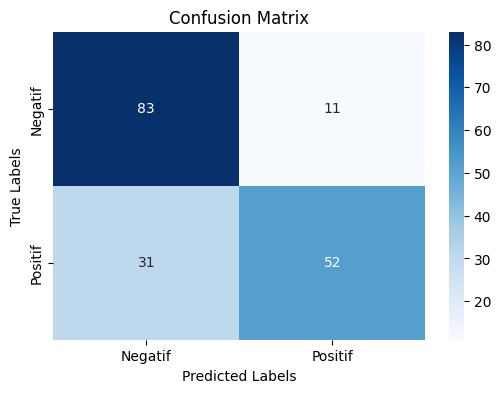

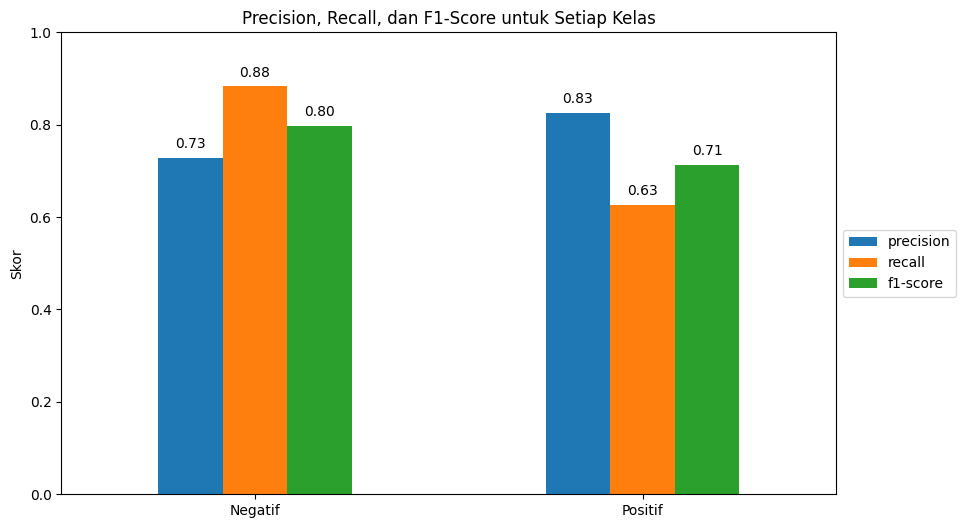

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negatif", "Positif"], yticklabels=["Negatif", "Positif"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

def plot_metrics(report):
    metrics_df = pd.DataFrame(report).transpose()
    metrics = metrics_df.loc[["Negatif", "Positif"], ["precision", "recall", "f1-score"]]

    ax = metrics.plot(kind="bar", figsize=(10, 6), legend=True, color=["#1f77b4", "#ff7f0e", "#2ca02c"])
    plt.title("Precision, Recall, dan F1-Score untuk Setiap Kelas")
    plt.ylabel("Skor")
    plt.ylim(0, 1)
    plt.xticks(rotation=0)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
    plt.show()

cm = confusion_matrix(y_test, predicted)
report = classification_report(y_test, predicted, output_dict=True, zero_division=0)

plot_confusion_matrix(cm)
plot_metrics(report)

# **Analisis Hasil Uji**
---

**Accuracy:**
<br>

<p align="justify"> Akurasi menunjukkan persentase prediksi yang benar dari total jumlah data. Dalam kasus ini, model memiliki tingkat akurasi sekitar 76.27%, yang berarti dari 177 data, sekitar 134 prediksi benar.

<br>
<br>

**Precision:**

<p align="justify"> Kemampuan model untuk memprediksi kelas tertentu dengan benar dari semua prediksi untuk kelas tersebut.

<br>

*   Negatif: 0.73 (73%) → Dari semua prediksi negatif, 73% adalah benar-benar negatif.
*   Positif: 0.83 (83%) → Dari semua prediksi positif, 83% adalah benar-benar positif.

<br>
<br>

**Recall:**

<p align="justify"> Kemampuan model untuk menemukan semua data dengan label tertentu.

<br>

*   Negatif: 0.88 (88%) → Dari semua data sebenarnya negatif, model berhasil menangkap 88%.
*   Positif: 0.63 (63%) → Dari semua data sebenarnya positif, model hanya berhasil menangkap 63%.

<br>
<br>

**F1-Score:**

<p align="justify"> Rata-rata harmonis antara precision dan recall

<br>

*   Negatif: 0.80 (80%)
*   Positif: 0.71 (71%) → Kelas negatif memiliki performa lebih baik dibandingkan kelas positif.

<br>
<br>

---

**Confusion Matrix:**
<br>

*   83: Jumlah data negatif yang diprediksi dengan benar sebagai negatif (True Negatives).
*   11: Jumlah data negatif yang salah diprediksi sebagai positif (False Positives).
*   31: Jumlah data positif yang salah diprediksi sebagai negatif (False Negatives).
*   52: Jumlah data positif yang diprediksi dengan benar sebagai positif (True Positives).

---
<br>
<br>

* Model memiliki akurasi sebesar 76.27%, dengan performa lebih baik pada kelas negatif dibandingkan positif.
* Model cukup baik untuk mendeteksi sentimen negatif (Recall 88%) tetapi kurang optimal dalam mendeteksi sentimen positif (Recall 63%).
* Ada ruang untuk perbaikan, terutama untuk meningkatkan performa pada kelas positif dengan langkah-langkah seperti penyeimbangan data, fitur tambahan, atau eksperimen dengan model lain.
